In [ ]:
pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
from sklearn.covariance import GraphicalLasso
import matplotlib.pyplot as plt
import networkx as nx

In [10]:

# 加载数据集
data = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')
data_france = data[data['country_name'] == 'France']
data_england =  data[data['country_name'] == 'England']


C:\Users\Windows\AppData\Local\Temp\ipykernel_5512\513896079.py:2: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


In [11]:
# 选择包含年份的相关变量
variables_with_year = ['city_latitude', 'city_longitude', 'year', 'riot_type_hiscod_num']

data_france_with_year = data_france[variables_with_year].dropna()
data_england_with_year = data_england[variables_with_year].dropna()

,city_latitude,city_longitude,year,riot_type_hiscod_num
0,43.448153,5.640495,1789.0,2.0
1,43.400500,5.340521,1789.0,5.0
2,43.550342,5.034236,1789.0,1.0
3,43.637600,5.526850,1789.0,5.0
4,43.805925,4.948908,1789.0,1.0
...,...,...,...,...
20942,48.039201,-0.476494,1791.0,3.0
20946,45.439683,4.387431,1789.0,8.0
20947,45.433102,4.327050,1789.0,8.0
20948,45.439683,4.387431,1789.0,8.0


In [12]:

# 拟合高斯图模型
model_france_with_year = GraphicalLasso(alpha=0.1)
model_england_with_year = GraphicalLasso(alpha=0.1)

model_france_with_year.fit(data_france_with_year)
model_england_with_year.fit(data_england_with_year)

GraphicalLasso(alpha=0.1)

In [13]:
# 提取精度矩阵
precision_matrix_france_with_year = model_france_with_year.precision_
precision_matrix_england_with_year = model_england_with_year.precision_

In [14]:
# 计算逆协方差矩阵
inverse_covariance_matrix_france_with_year = np.linalg.inv(model_france_with_year.covariance_)
inverse_covariance_matrix_england_with_year = np.linalg.inv(model_england_with_year.covariance_)

In [16]:
precision_matrix_france_with_year

array([[ 2.25390985e-01,  4.08711175e-02, -2.64984731e-04,
         3.09558410e-02],
       [ 4.08711175e-02,  1.68591835e-01,  2.34265787e-04,
        -1.56643266e-02],
       [-2.64984731e-04,  2.34265787e-04,  1.69677229e-04,
        -8.60333698e-04],
       [ 3.09558410e-02, -1.56643266e-02, -8.60333698e-04,
         1.10011832e-01]])

In [17]:
precision_matrix_france_with_year[0, 1]

0.04087111745395523

In [26]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {'alpha': np.logspace(-2, 1, 10)}

# 使用GridSearchCV进行超参数选择
model_france_with_year = GraphicalLasso()
grid_search = GridSearchCV(model_france_with_year, param_grid, cv=5)
grid_search.fit(data_france_with_year)

# 输出最优参数
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for France: {best_alpha}")

precision_matrix_france_with_year = model_france_with_year.precision_



Best alpha for France: 0.21544346900318834


In [30]:
print(precision_matrix_france_with_year)

[[ 2.25390985e-01  4.08711175e-02 -2.64984731e-04  3.09558410e-02]
 [ 4.08711175e-02  1.68591835e-01  2.34265787e-04 -1.56643266e-02]
 [-2.64984731e-04  2.34265787e-04  1.69677229e-04 -8.60333698e-04]
 [ 3.09558410e-02 -1.56643266e-02 -8.60333698e-04  1.10011832e-01]]


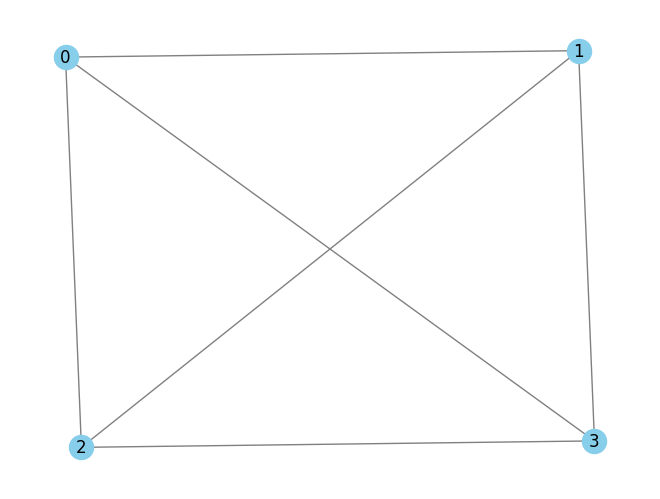

变量 0 和 变量 1 之间有条件依赖关系
变量 0 和 变量 2 之间有条件依赖关系
变量 0 和 变量 3 之间有条件依赖关系
变量 1 和 变量 2 之间有条件依赖关系
变量 1 和 变量 3 之间有条件依赖关系
变量 2 和 变量 3 之间有条件依赖关系


In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
graph = nx.Graph()

# 添加节点
n_features = 4
graph.add_nodes_from(range(n_features))

# 添加边（根据精度矩阵）
for i in range(n_features):
    for j in range(i + 1, n_features):
        if precision_matrix_france_with_year[i, j] != 0:
            graph.add_edge(i, j)

# 绘制图
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='gray')
plt.show()


for edge in graph.edges():
    print(f"变量 {edge[0]} 和 变量 {edge[1]} 之间有条件依赖关系")

In [25]:
# 定义参数网格
param_grid = {'alpha': np.logspace(-2, 1, 10)}

# 使用GridSearchCV进行超参数选择
model = GraphicalLasso()
grid_search = GridSearchCV(model_england_with_year, param_grid, cv=5)
grid_search.fit(data_england_with_year)

# 输出最优参数
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for England: {best_alpha}")


precision_matrix_england_with_year = model_england_with_year.precision_


Best alpha for England: 10.0


In [32]:
print(precision_matrix_england_with_year)

[[ 1.03020746e+00 -0.00000000e+00 -2.85612289e-03  1.42519663e-02]
 [-0.00000000e+00  4.76202594e-01  1.86856191e-03 -7.14009016e-02]
 [-2.85612289e-03  1.86856191e-03  6.85444332e-04 -5.34185220e-03]
 [ 1.42519663e-02 -7.14009016e-02 -5.34185220e-03  1.16794200e-01]]


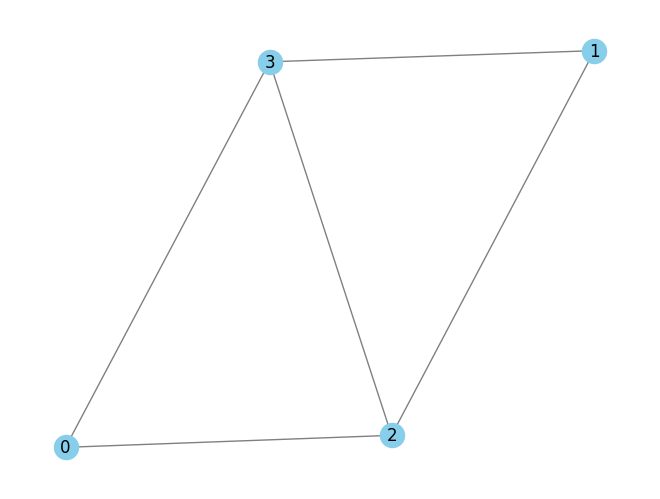

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
graph2 = nx.Graph()

# 添加节点
n_features = 4
graph2.add_nodes_from(range(n_features))

# 添加边（根据精度矩阵）
for i in range(n_features):
    for j in range(i + 1, n_features):
        if precision_matrix_england_with_year[i, j] != 0:
            graph2.add_edge(i, j)

# 绘制图
pos = nx.spring_layout(graph2)
nx.draw(graph2, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='gray')
plt.show()

In [ ]:








# 创建包含逆协方差矩阵的数据框
variables = ['city_latitude', 'city_longitude', 'year', 'riot_type_hiscod_num']

inverse_cov_df_france = pd.DataFrame(inverse_covariance_matrix_france_with_year, index=variables, columns=variables)
inverse_cov_df_england = pd.DataFrame(inverse_covariance_matrix_england_with_year, index=variables, columns=variables)

# 保存数据框到Excel文件
output_path = '/content/drive/MyDrive/Colab Notebooks/GGM模型/GGM模型inverse_covariance_matrices.xlsx'
with pd.ExcelWriter(output_path) as writer:
    inverse_cov_df_france.to_excel(writer, sheet_name='France (With Year)')
    inverse_cov_df_england.to_excel(writer, sheet_name='England (With Year)')




Excel file saved to /content/drive/MyDrive/Colab Notebooks/GGM模型/GGM模型inverse_covariance_matrices.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import GraphicalLasso
from geopy.distance import great_circle

# 加载数据集
file_path = '/content/drive/MyDrive/Colab Notebooks/GGM模型/data/整理数据.xlsx'  #谷歌云端colab写的，需要换成您自己本地位置
data = pd.read_excel(file_path, sheet_name=None)
data_france = data['Sheet1'][data['Sheet1']['country_name'] == 'France']
data_england = data['Sheet1'][data['Sheet1']['country_name'] == 'England']

# 清理数据，去除包含NaN的行
data_france = data_france.dropna(subset=['city_latitude', 'city_longitude'])
data_england = data_england.dropna(subset=['city_latitude', 'city_longitude'])

# 采用great_circle计算距离
def compute_distance_matrix(data):
    coordinates = data[['city_latitude', 'city_longitude']].values
    n = coordinates.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = great_circle(coordinates[i], coordinates[j]).kilometers
    return distance_matrix

# 计算法国和英格兰的数据的距离矩阵，采用均值距离的方法
distance_matrix_france = compute_distance_matrix(data_france)
distance_matrix_england = compute_distance_matrix(data_england)

# 将距离矩阵转换为DataFrame，并添加到原始数据集中
distance_df_france = pd.DataFrame(distance_matrix_france, index=data_france.index, columns=data_france.index)
distance_df_england = pd.DataFrame(distance_matrix_england, index=data_england.index, columns=data_england.index)

# 将距离作为新变量添加到数据集中
data_france_with_distance = data_france.join(distance_df_france.mean(axis=1).rename('avg_distance'))
data_england_with_distance = data_england.join(distance_df_england.mean(axis=1).rename('avg_distance'))

# 选择包含距离的相关变量
variables_with_distance = ['city_latitude', 'city_longitude', 'year', 'riot_type_hiscod_num', 'avg_distance']

data_france_with_distance = data_france_with_distance[variables_with_distance].dropna()
data_england_with_distance = data_england_with_distance[variables_with_distance].dropna()

# 拟合高斯图模型
model_france_with_distance = GraphicalLasso(alpha=0.1)
model_england_with_distance = GraphicalLasso(alpha=0.1)

model_france_with_distance.fit(data_france_with_distance)
model_england_with_distance.fit(data_england_with_distance)

# 提取精度矩阵
precision_matrix_france_with_distance = model_france_with_distance.precision_
precision_matrix_england_with_distance = model_england_with_distance.precision_

# 计算逆协方差矩阵
inverse_covariance_matrix_france_with_distance = np.linalg.inv(model_france_with_distance.covariance_)
inverse_covariance_matrix_england_with_distance = np.linalg.inv(model_england_with_distance.covariance_)

# 创建逆协方差矩阵的数据框格式
variables_with_distance = ['city_latitude', 'city_longitude', 'year', 'riot_type_hiscod_num', 'avg_distance']

inverse_cov_df_france = pd.DataFrame(inverse_covariance_matrix_france_with_distance, index=variables_with_distance, columns=variables_with_distance)
inverse_cov_df_england = pd.DataFrame(inverse_covariance_matrix_england_with_distance, index=variables_with_distance, columns=variables_with_distance)

# 保存Englland和France的逆协方差矩阵到Excel文件
output_path = '/content/drive/MyDrive/Colab Notebooks/GGM模型/GMM模型inverse_covariance_matrices_with_distance.xlsx'
with pd.ExcelWriter(output_path) as writer:
    inverse_cov_df_france.to_excel(writer, sheet_name='France (With Distance)')
    inverse_cov_df_england.to_excel(writer, sheet_name='England (With Distance)')




Excel file saved to /content/drive/MyDrive/Colab Notebooks/GGM模型/inverse_covariance_matrices_with_distance.xlsx
